<a href="https://colab.research.google.com/github/Manas94/GUI-project/blob/main/Eye_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
import os
from numpy import argmax

In [ ]:
path = "/content/gdrive/MyDrive/diseases"

In [ ]:
data_dir_list = os.listdir(path)
data_dir_list

['cataract', 'glaucoma', 'retina_disease', 'normal']

In [ ]:
datagen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=True,
                               fill_mode='nearest',# Fill in missing pixels with the nearest filled value
                              )

In [ ]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 100
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(path +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(path +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from cataract folder
Getting image from glaucoma folder
Getting image from retina_disease folder
Getting image from normal folder


In [ ]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

num_classes 4
Shape of image data (601, 224, 224, 3)
number of samples 601
target column before encoding ['cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'cataract', 'catar

In [ ]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3])

In [ ]:
target_column

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
CNN_MODLE = Sequential()

CNN_MODLE.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
CNN_MODLE.add(Conv2D(64,(3,3),activation='relu'))
CNN_MODLE.add(MaxPool2D(pool_size=(2,2)))
CNN_MODLE.add(Dropout(0.2))

CNN_MODLE.add(Conv2D(128,(3,3),activation='relu'))
CNN_MODLE.add(Conv2D(128,(3,3),activation='relu'))
CNN_MODLE.add(MaxPool2D(pool_size=(2,2)))
CNN_MODLE.add(Dropout(0.2))

CNN_MODLE.add(Flatten())
CNN_MODLE.add(Dense(128,activation='relu'))
CNN_MODLE.add(Dropout(0.2))
CNN_MODLE.add(Dense(num_classes,activation='softmax'))
CNN_MODLE.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

CNN_MODLE.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 128)     147584    
                                                      

In [ ]:
hist = CNN_MODLE.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))


Epoch 1/100
14/14 [==============================] - 7s 345ms/step - loss: 2.8990 - accuracy: 0.3857 - val_loss: 1.2641 - val_accuracy: 0.4917
Epoch 2/100
14/14 [==============================] - 4s 302ms/step - loss: 1.2595 - accuracy: 0.5024 - val_loss: 1.2577 - val_accuracy: 0.4917
Epoch 3/100
14/14 [==============================] - 4s 302ms/step - loss: 1.2517 - accuracy: 0.5024 - val_loss: 1.2482 - val_accuracy: 0.4917
Epoch 4/100
14/14 [==============================] - 5s 336ms/step - loss: 1.2533 - accuracy: 0.5024 - val_loss: 1.3278 - val_accuracy: 0.4917
Epoch 5/100
14/14 [==============================] - 5s 335ms/step - loss: 1.2677 - accuracy: 0.5024 - val_loss: 1.2574 - val_accuracy: 0.4917
Epoch 6/100
14/14 [==============================] - 4s 322ms/step - loss: 1.2393 - accuracy: 0.5024 - val_loss: 1.2468 - val_accuracy: 0.4917
Epoch 7/100
14/14 [==============================] - 4s 323ms/step - loss: 1.2449 - accuracy: 0.5024 - val_loss: 1.2494 - val_accuracy: 0.4917

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


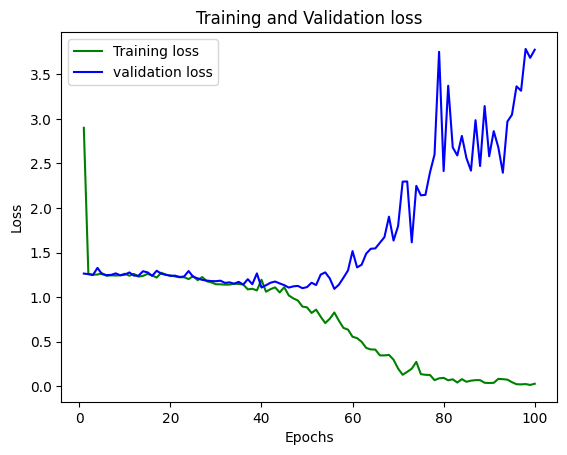

In [ ]:
print(hist.history.keys())
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

100 100


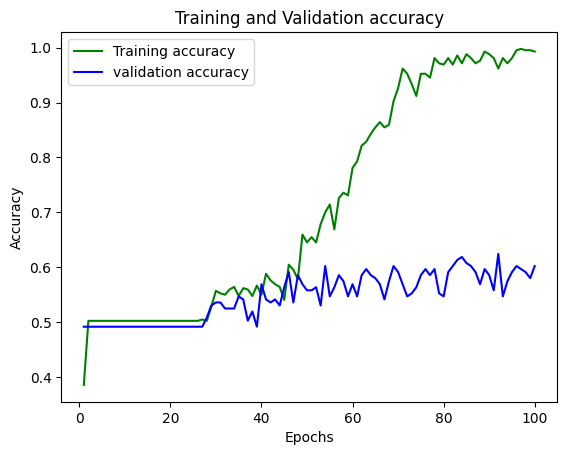

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
print(len(loss_train), len(loss_val))
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
cnn_score = CNN_MODLE.evaluate(X_test,y_test,batch_size=batch_size)
y_predicted_cnn = CNN_MODLE.predict(X_test)
print('Test Loss',cnn_score[0])
print("Test Accuracy",cnn_score[1])

6/6 [==============================] - 0s 57ms/step
Test Loss 3.7747201919555664
Test Accuracy 0.6022099256515503


In [ ]:
y_pred=np.argmax(y_predicted_cnn, axis=1)
y_test_cnn=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cnn, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.42      0.25      0.31        32
           2       0.66      0.82      0.73        89
           3       0.30      0.21      0.24        29

    accuracy                           0.60       181
   macro avg       0.52      0.50      0.50       181
weighted avg       0.57      0.60      0.58       181



In [ ]:
cm = confusion_matrix(y_test_cnn, y_pred)
cm

array([[22,  1,  5,  3],
       [ 5,  8, 18,  1],
       [ 2,  4, 73, 10],
       [ 2,  6, 15,  6]])

Text(95.72222222222221, 0.5, 'Truth')

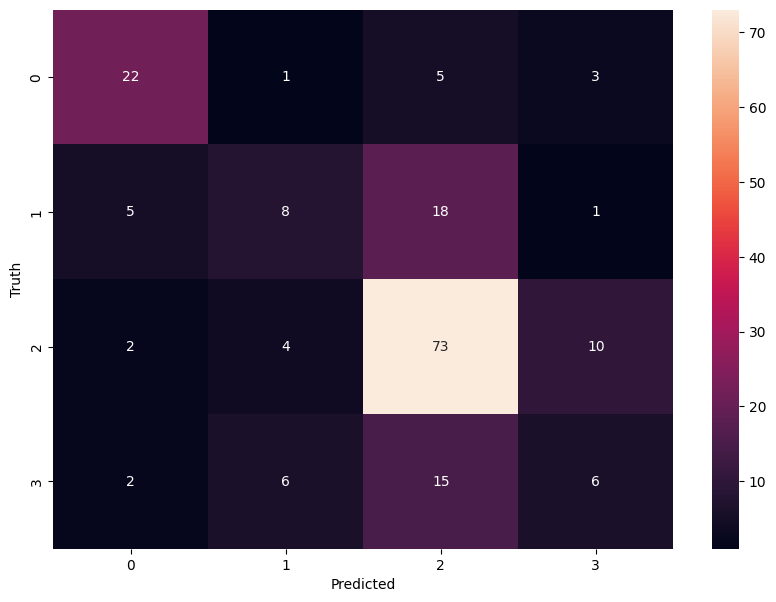

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
CNN_MODLE.save_weights('CNN.h5')

In [ ]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights = "imagenet", include_top=False, input_shape = (224,224,3))

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = vgg19_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

In [ ]:
vgg19_model = Model(inputs=vgg19_model.input, outputs=predictions)

In [ ]:
vgg19_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
vgg19_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
hist = vgg19_model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))


Epoch 1/100
14/14 [==============================] - 9s 590ms/step - loss: 1.4359 - accuracy: 0.4381 - val_loss: 1.2042 - val_accuracy: 0.4917
Epoch 2/100
14/14 [==============================] - 3s 248ms/step - loss: 1.1795 - accuracy: 0.5405 - val_loss: 1.1261 - val_accuracy: 0.4917
Epoch 3/100
14/14 [==============================] - 3s 250ms/step - loss: 1.0845 - accuracy: 0.5476 - val_loss: 1.1028 - val_accuracy: 0.5580
Epoch 4/100
14/14 [==============================] - 3s 251ms/step - loss: 1.0342 - accuracy: 0.5786 - val_loss: 1.1064 - val_accuracy: 0.5691
Epoch 5/100
14/14 [==============================] - 3s 250ms/step - loss: 1.0079 - accuracy: 0.5738 - val_loss: 1.1024 - val_accuracy: 0.6022
Epoch 6/100
14/14 [==============================] - 3s 248ms/step - loss: 1.0159 - accuracy: 0.6238 - val_loss: 0.9859 - val_accuracy: 0.5856
Epoch 7/100
14/14 [==============================] - 3s 252ms/step - loss: 0.9893 - accuracy: 0.6333 - val_loss: 1.0542 - val_accuracy: 0.5746

In [ ]:
vgg19_model.save_weights('VGG19.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


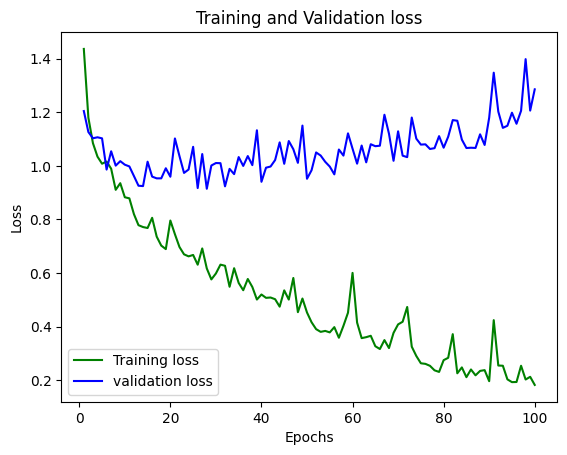

In [ ]:
print(hist.history.keys())
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


100 100


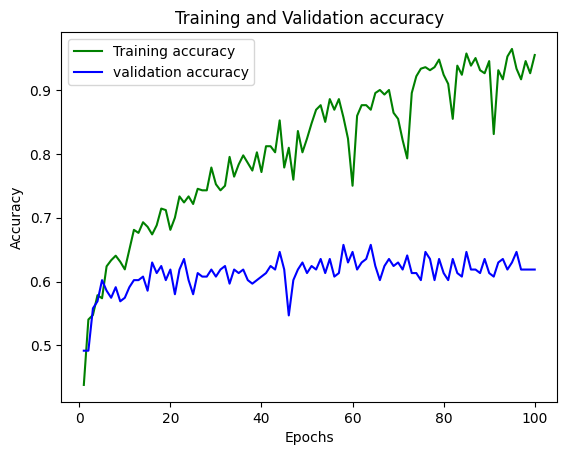

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
print(len(loss_train), len(loss_val))
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
vgg_score = vgg19_model.evaluate(X_test,y_test,batch_size=batch_size)
y_predicted_vgg = vgg19_model.predict(X_test)
print('Test Loss',vgg_score[0])
print("Test Accuracy",vgg_score[1])

6/6 [==============================] - 1s 146ms/step
Test Loss 1.2852160930633545
Test Accuracy 0.6187845468521118


In [ ]:
y_pred=np.argmax(y_predicted_vgg, axis=1)
y_test_vgg=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_vgg, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        31
           1       0.53      0.31      0.39        32
           2       0.63      0.88      0.73        89
           3       0.50      0.03      0.06        29

    accuracy                           0.62       181
   macro avg       0.57      0.49      0.47       181
weighted avg       0.59      0.62      0.56       181



In [ ]:
cm = confusion_matrix(y_test_vgg, y_pred)
cm

array([[23,  1,  7,  0],
       [ 5, 10, 17,  0],
       [ 5,  5, 78,  1],
       [ 3,  3, 22,  1]])

Text(95.72222222222221, 0.5, 'Truth')

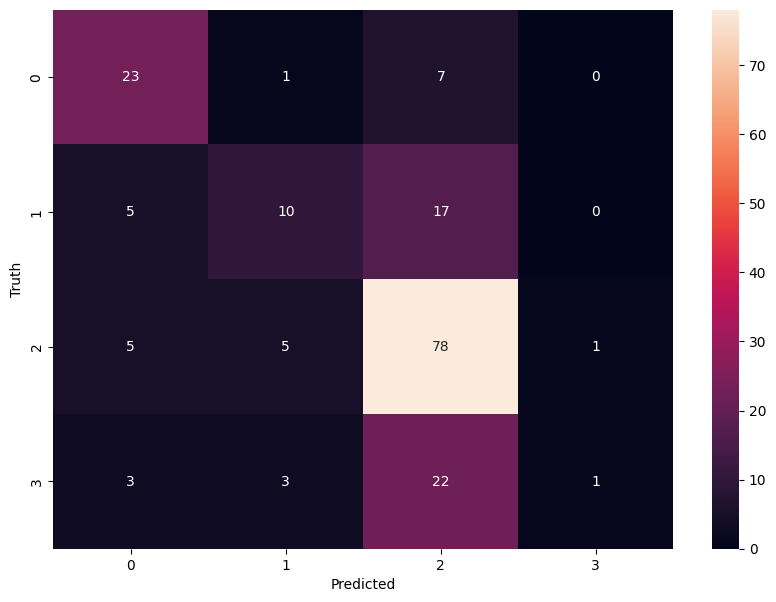

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0, 0.5, 'Percentage')

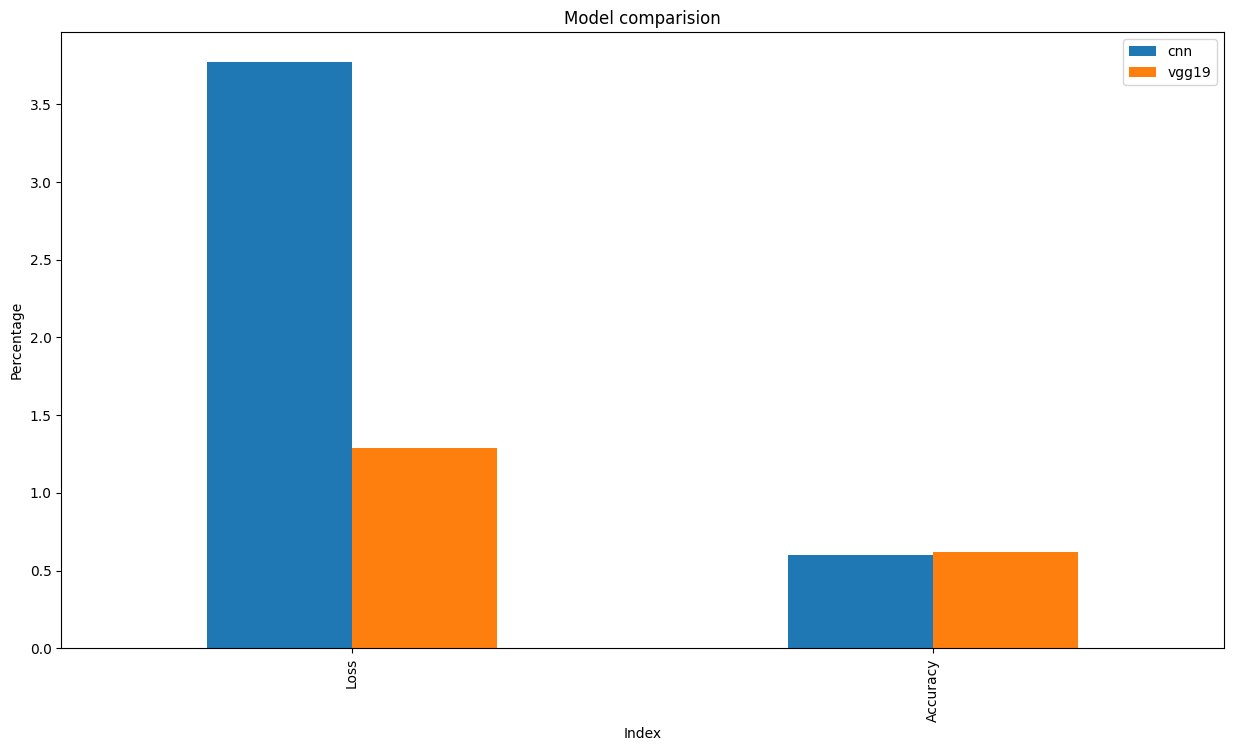

In [ ]:
plotdata = pd.DataFrame({

    "cnn": cnn_score,
    "vgg19":vgg_score},
    index=["Loss", "Accuracy"])
plotdata.plot(kind="bar",figsize=(10, 10))
plt.title("Model comparision")
plt.xlabel("Index")
plt.ylabel("Percentage")
